In [27]:
import pandas as pd
from collections import Counter 
from preprocessing import PREPROCESSING
import matplotlib
import seaborn as sns

In [28]:
data = pd.read_json('Data_rescored.json')
data.count()

ARTICLE      1244
BODY         1244
DATE         1244
HEADLINE     1244
SENTIMENT     343
dtype: int64

# Positive Documents

In [48]:
positive = data[data.SENTIMENT==1]

In [49]:
w_list = []
for string in positive.BODY.values:
    t = PREPROCESSING.process_lemmatizer(string)
    for w in t:
        w_list.append(w)

In [73]:
count_pos = Counter(w_list) 

most_pos = count_pos.most_common(40)
df = pd.DataFrame(most_pos, columns=['word', 'frequency'])
df.loc[df.word == 'ha', 'word'] = 'have'
df.head()

,word,frequency
0,bank,350
1,bond,200
2,investor,136
3,coco,134
4,risk,122


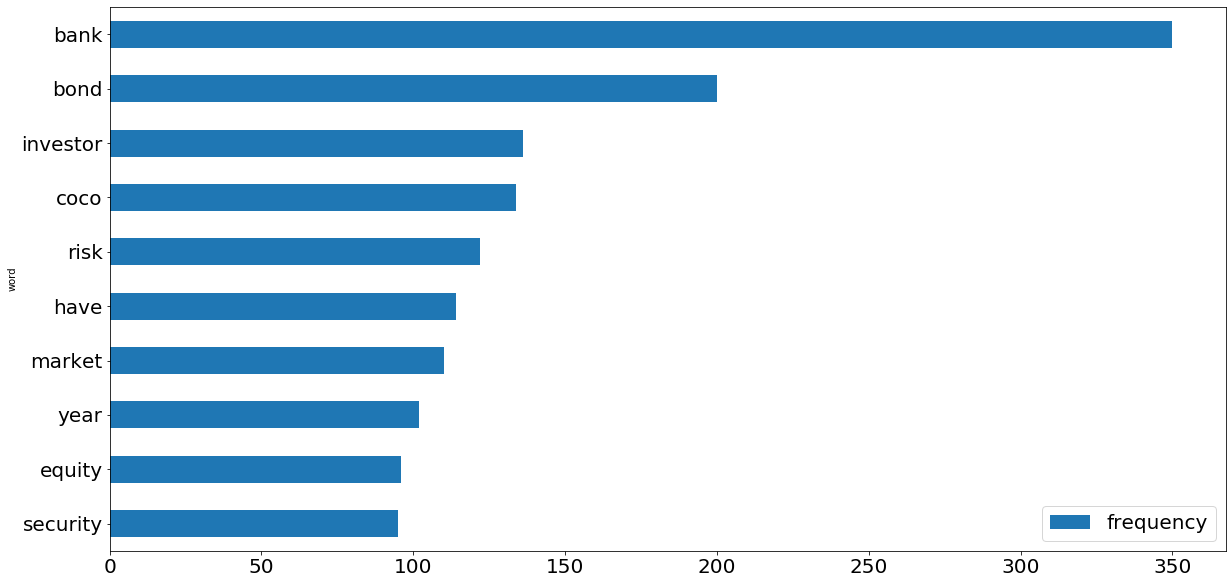

In [74]:
df.iloc[::-1].tail(10).plot(x='word', kind='barh', figsize=(20,10), fontsize= 20).legend(loc='lower right', fontsize = 20)

# Negative Documents

In [54]:
negative = data[data.SENTIMENT==-1]

In [55]:
w_list = []
for string in negative.BODY.values:
    t = PREPROCESSING.process_lemmatizer(string)
    for w in t:
        w_list.append(w)

In [75]:
count_neg = Counter(w_list) 

most_neg = count_neg.most_common(40) 
df_neg = pd.DataFrame(most_neg, columns=['word', 'frequency'])
df_neg.loc[df_neg.word == 'ha', 'word'] = 'have'
df_neg.head()

,word,frequency
0,bank,350
1,bond,200
2,investor,136
3,coco,134
4,risk,122


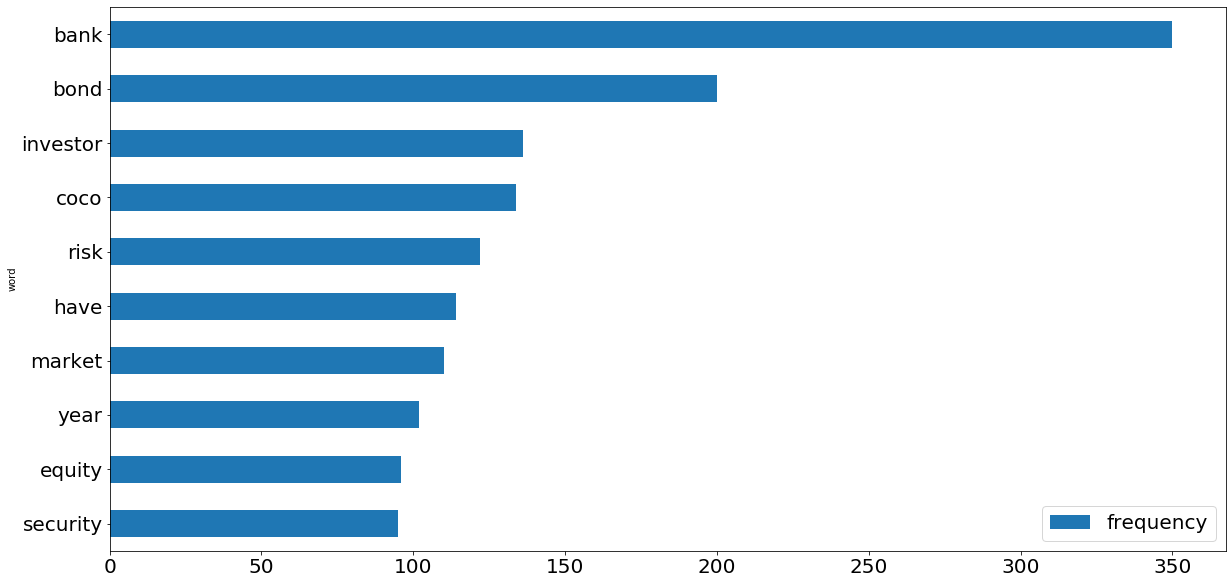

In [78]:
df_neg.iloc[::-1].tail(10).plot(x='word', kind='barh', figsize=(20,10), fontsize= 20).legend(loc='lower right', fontsize = 20)

In [26]:
print('SOLID', 'positive', count_pos['solid'], 'negative', count_neg['solid'] )
print('STABLE', 'positive', count_pos['stable'], 'negative', count_neg['stable'] )
print('RISK', 'positive', count_pos['risk'], 'negative', count_neg['risk'] )
print('CRISIS', 'positive', count_pos['crisis'], 'negative', count_neg['crisis'] )

SOLID positive 3 negative 1
STABLE positive 8 negative 5
RISK positive 20 negative 122
CRISIS positive 8 negative 54
